In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
pd.set_option('display.max_columns', None)
color = ['#247BA0', '#F6511D', '#7FB800', '#FFB400', '#F25F5C', '#50514F']

# Introduction

Olist is an E-Commerce company which is established in 2015, it offers digital sales solution to sellers by connecting them to the digital market. With technology and market insights, Olist can help sellers to establish digital brand image and increase sales channel.

For an E-Commerce company, it is crucial to understand the needs of customers. With exploratory data analysis and machine learning model, we try to understand customer satisfaction and find out potential business value in the data.

By studying the Olist data, we can get insights of the E-Commerce field. The ideas and models can be possibly to apply to other companies in the E-Commerce field, but not only Olist itself.


The Brazilian E-Commerce Public Dataset by Olist is abailable on Kaggle.
https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce


We are going to use the Brazilian E-Commerce Public Dataset by Olist on Kaggle in this project, and since we are going to study the customer satisfaction, so we select the customers, order items, order payment, order review, products dataset to start our work.

In [2]:
olist_customers_dataset = pd.read_csv('olist_customers_dataset.csv')
olist_geolocation_dataset = pd.read_csv('olist_geolocation_dataset.csv')
olist_order_items_dataset = pd.read_csv('olist_order_items_dataset.csv')
olist_order_payments_dataset = pd.read_csv('olist_order_payments_dataset.csv')
olist_order_reviews_dataset = pd.read_csv('olist_order_reviews_dataset.csv')
olist_orders_dataset = pd.read_csv('olist_orders_dataset.csv')
olist_products_dataset = pd.read_csv('olist_products_dataset.csv')
olist_sellers_dataset = pd.read_csv('olist_sellers_dataset.csv')
product_category_name_translation = pd.read_csv('product_category_name_translation.csv')

In [3]:
olist_customers_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
olist_orders_dataset['purchase_date'] = pd.to_datetime(olist_orders_dataset['order_purchase_timestamp']).dt.date

In [5]:
order_count = olist_orders_dataset.groupby('purchase_date')[['order_id']].count().reset_index()

# Sales Performance

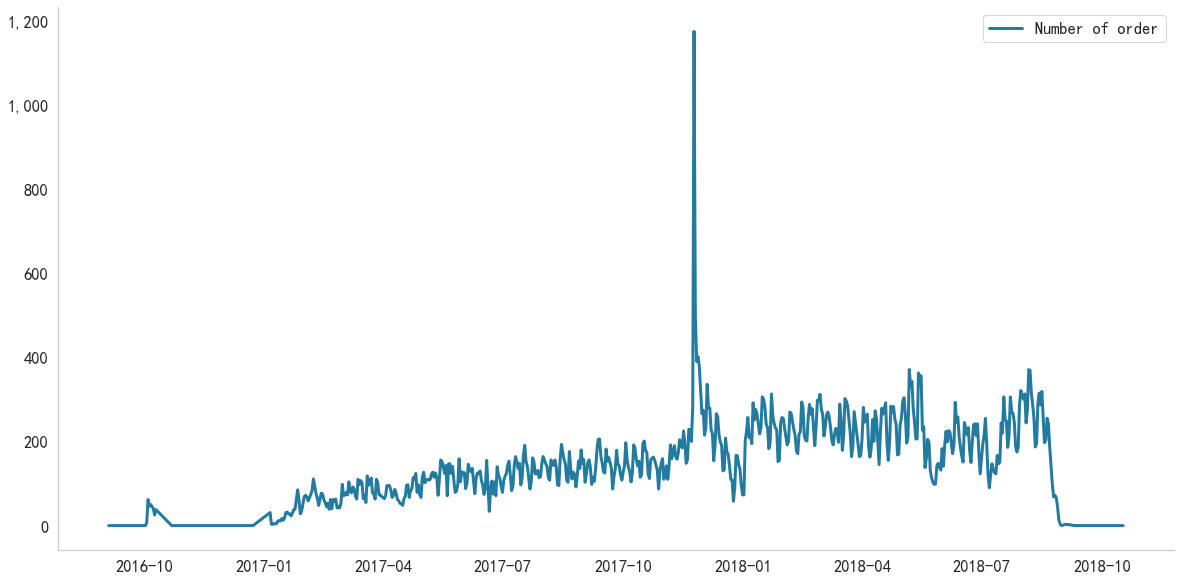

In [6]:
sns.set(font = 'SimHei', style = 'whitegrid', font_scale = 1.5)
sns.set_palette(color)
fig, axes = plt.subplots(figsize=(20,10))
plt.plot(order_count['purchase_date'], order_count['order_id'], 
         label = 'Number of order', linewidth = 3)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
axes.grid()
plt.legend()

After looking at the time series dataset, we discovered that the date range of the data is from 2016 to 2018, but some data is missing in 2016 and 2018, so we are going to focus only the 2017 data to observe the whole year performance.

In [7]:
order_count = order_count[(order_count['purchase_date'] >= datetime.date(2017,1,1)) & (order_count['purchase_date'] < datetime.date(2018,1,1))]

In [8]:
order_count.sum()

order_id    45101
dtype: int64

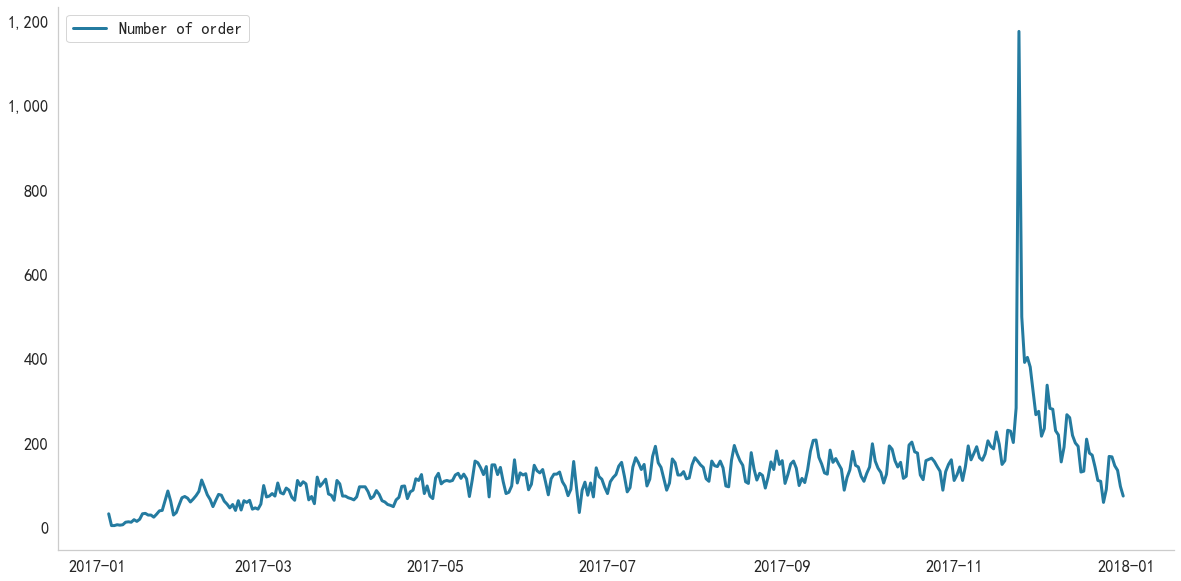

In [9]:
sns.set(font = 'SimHei', style = 'whitegrid', font_scale = 1.5)
sns.set_palette(color)
fig, axes = plt.subplots(figsize=(20,10))
plt.plot(order_count['purchase_date'], order_count['order_id'], 
         label = 'Number of order', linewidth = 3)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
axes.grid()
plt.legend()

In [10]:
olist_orders_dataset['purchase_month'] = olist_orders_dataset['order_purchase_timestamp'].astype(str).str.slice(0, 7)
order_count_month = olist_orders_dataset.groupby('purchase_month')[['order_id']].count().reset_index()
order_count_month['purchase_month'] = order_count_month['purchase_month'].astype('datetime64[ns]')
order_count_month = order_count_month[(order_count_month['purchase_month'] >= '2017-01-01') & (order_count_month['purchase_month'] < '2018-01-01')]

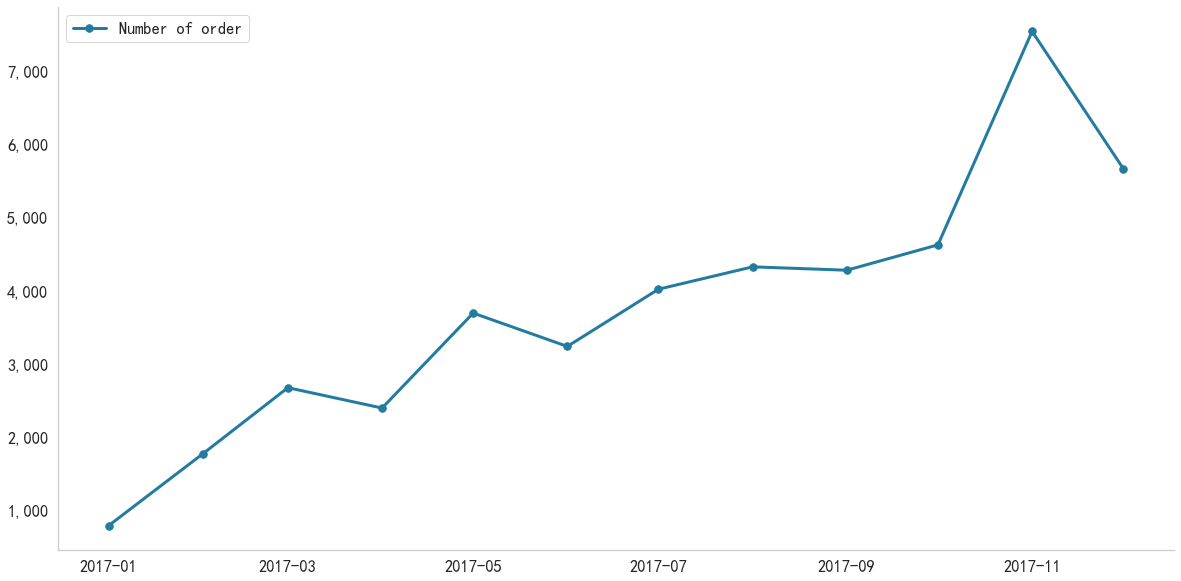

In [11]:
sns.set(font = 'SimHei', style = 'whitegrid', font_scale = 1.5)
sns.set_palette(color)
fig, axes = plt.subplots(figsize=(20,10))
plt.plot(order_count_month['purchase_month'], order_count_month['order_id'], 
         label = 'Number of order', marker = '.', markersize = 15, linewidth = 3)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
axes.grid()
plt.legend()

In [12]:
order_count_month['order_id'].mean()

3758.4166666666665

In [13]:
order_count_month['order_id'].max()

7544

There are 45,101 orders in 2017, and we can see that there is a huge increase in sales in November, but sales finally decreased in December.

In [14]:
order_count['order_id'].mean()

124.93351800554017

In [15]:
order_count[order_count['order_id'] == 1176]

,purchase_date,order_id
338,2017-11-24,1176


To find out the reason behind the huge increase in November, we look at the daily sales. We can find that it is because of Black Friday, that day recorded 1,176 orders, which is almost ten times of average daily number of orders which is 125.

Overall, sales are going up and Black Friday is an important catalyst for sales performance.

# Order Payment

In [16]:
price_stat = pd.merge(olist_orders_dataset, olist_order_payments_dataset)

In [17]:
price_stat = price_stat[(price_stat['purchase_date'] >= datetime.date(2017,1,1)) & (price_stat['purchase_date'] < datetime.date(2018,1,1))]

In [18]:
price_stat = price_stat.groupby('order_id')[['payment_value']].sum().reset_index()

In [19]:
price_stat.head()

,order_id,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,00042b26cf59d7ce69dfabb4e55b4fd9,218.04
3,00048cc3ae777c65dbb7d2a0634bc1ea,34.59
4,00054e8431b9d7675808bcb819fb4a32,31.75


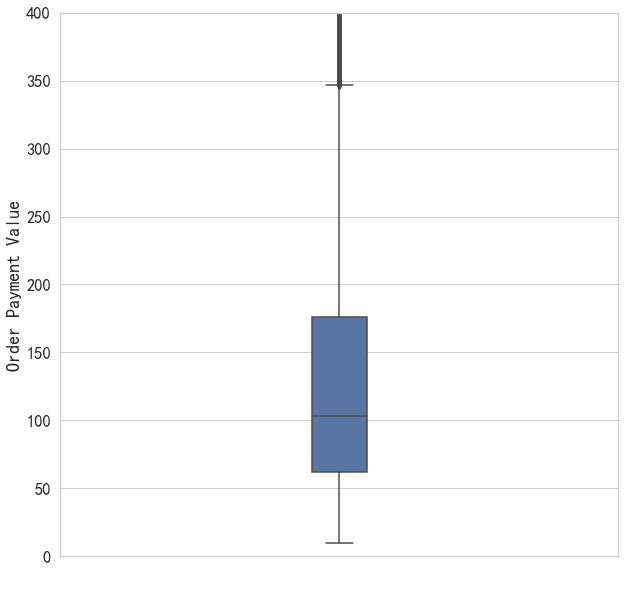

In [20]:
sns.set(font = 'SimHei', style = 'whitegrid', font_scale = 1.5)
fig, axes = plt.subplots(figsize=(10,10))
sns.boxplot(data = price_stat['payment_value'], width = 0.1)
axes.set_ylim(0)
axes.set_ylabel('Order Payment Value')
axes.set_xlabel(' ')
axes.set_xticklabels(' ')
axes.set_ylim(0,400)
axes.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

In [21]:
price_stat.describe()

,payment_value
count,45101.000000
mean,160.744700
std,228.351475
min,10.070000
25%,61.770000
50%,103.550000
75%,175.860000
max,13664.080000


The mean of the order value is about R$100, which means that most of the orders may be involve daily lives products, but not luxury goods.

In [22]:
payment_count = pd.merge(olist_orders_dataset, olist_order_payments_dataset)
payment_count = payment_count[(payment_count['purchase_date'] >= datetime.date(2017,1,1)) & (payment_count['purchase_date'] < datetime.date(2018,1,1))]
payment_count = payment_count.groupby(['purchase_month', 'payment_type'])[['order_id']].count().reset_index()
payment_count = pd.pivot_table(payment_count, index = 'purchase_month', columns = 'payment_type', values = 'order_id', aggfunc = sum).fillna(0)

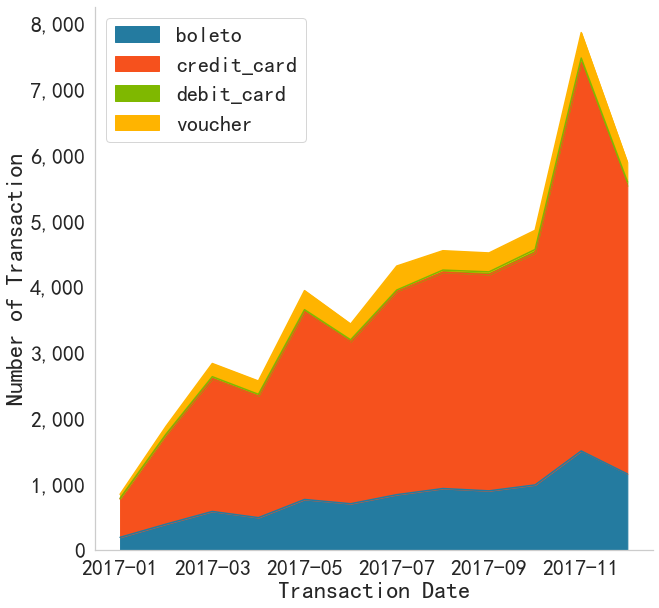

In [23]:
sns.set(font = 'SimHei', style = 'whitegrid', font_scale = 2)
sns.set_palette(color)
axes = payment_count.plot.area(figsize=(10,10))
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_xlabel('Transaction Date')
axes.set_ylabel('Number of Transaction')
axes.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
axes.grid()
plt.legend()

In [24]:
payment_count.sum()

payment_type
boleto          9508
credit_card    34568
debit_card       422
voucher         3027
dtype: int64

In [25]:
payment_count.sum() / payment_count.sum().sum()

payment_type
boleto         0.200063
credit_card    0.727365
debit_card     0.008880
voucher        0.063693
dtype: float64

Around 72% of the orders are paid by credit card, and around 20% of the orders are paid by Boleto, which is a payment method in Brazil regulated by Brazilian Federation of Banks.

# Customer Satisfaction

In [26]:
review_stat = pd.merge(olist_orders_dataset, olist_order_reviews_dataset)
review_stat = review_stat[(review_stat['purchase_date'] >= datetime.date(2017,1,1)) & (review_stat['purchase_date'] < datetime.date(2018,1,1))]

In [27]:
review_stat['review_score'].value_counts()

5    25825
4     8889
1     5049
3     3815
2     1466
Name: review_score, dtype: int64

The table above shows customer review scores of each order. It is surprised that rating of 1 to 2 accounts for 14%, which implies that customer unsatisfaction exists.

In [28]:
low_rate_comment = review_stat[(review_stat['review_score'] == 1) | (review_stat['review_score'] == 2)]
low_rate_comment = low_rate_comment[['review_comment_message']]
low_rate_comment = low_rate_comment.dropna()

In [29]:
low_rate_comment.head()

,review_comment_message
6,fiquei triste por n ter me atendido.
10,Aguardando retorno da loja
19,os correios estäo em greve... näo recebi nenhu...
29,O produto veio faltando a base para auto e com...
40,"Inicialmente, na data da compra o produto era ..."


In [30]:
from wordcloud import WordCloud

In [31]:
wordcloud = WordCloud(background_color="white", height = 500, width = 500).generate(str(low_rate_comment['review_comment_message'].values))

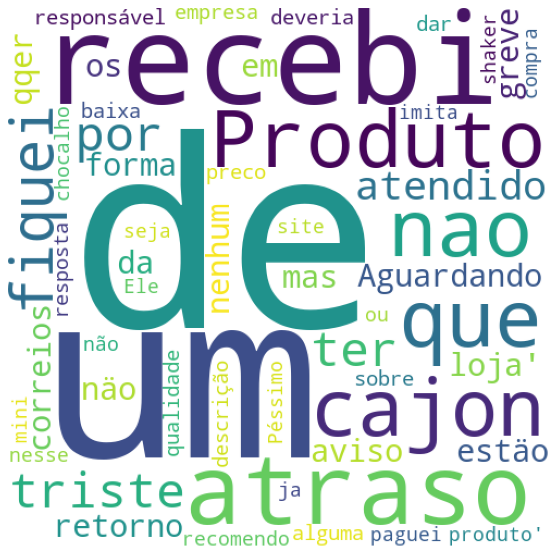

In [32]:
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(wordcloud)
plt.show()

The above word cloud shows the keywords of orders which are rated from 1 to 2. “triste”, “atraso”, “aguardando”, “retorno”, “pessimo”, “qualidade”, these keywords imply that product quality and delayed delivery may be the reasons of low customer satification.

# Product Category

In [33]:
order_item = pd.merge(olist_order_items_dataset, olist_products_dataset[['product_id', 'product_category_name']])
order_item = pd.merge(order_item, product_category_name_translation)
order_item = pd.merge(order_item, olist_orders_dataset[['order_id', 'purchase_date']])
order_item = order_item[(order_item['purchase_date'] >= datetime.date(2017,1,1)) & (order_item['purchase_date'] < datetime.date(2018,1,1))]
order_item = order_item.groupby('product_category_name_english')[['order_id']].count().reset_index()

In [34]:
order_item.sort_values('order_id', ascending = False).head(10)

,product_category_name_english,order_id
7,bed_bath_table,5223
39,furniture_decor,4147
65,sports_leisure,4095
43,health_beauty,3668
15,computers_accessories,3098
49,housewares,2906
69,toys,2602
42,garden_tools,2463
20,cool_stuff,2315
70,watches_gifts,2283


The above list shows the top ten sales of product in 2017. With the average order value calculated before, we can know that stores on olist focus on daily lives products, but not luxury goods.

# Classification Model

From the exploratory data analysis, we know that delayed delivery may be the reasons of low customer satification. In the following, we are going to create the model to classify whether customer satisfied or not based on delivery time.

In [35]:
olist_orders_dataset['delivery_days'] = (olist_orders_dataset['order_delivered_customer_date'].astype('datetime64[ns]') - olist_orders_dataset['order_purchase_timestamp'].astype('datetime64[ns]')).dt.days

In [36]:
model_df = pd.merge(olist_orders_dataset[(olist_orders_dataset['purchase_date'] >= datetime.date(2017,1,1)) & (olist_orders_dataset['purchase_date'] < datetime.date(2018,1,1))], olist_order_reviews_dataset, on = 'order_id')[['order_id', 'delivery_days', 'review_score']]
model_df.dropna(inplace = True)

We assume orders with review score below 3 are unsatisfied.

In [37]:
model_df.loc[model_df['review_score'] < 3, 'satisfaction'] = 0
model_df.loc[model_df['review_score'] >= 3, 'satisfaction'] = 1

In [38]:
model_df['satisfaction'].value_counts()

1.0    38159
0.0     5256
Name: satisfaction, dtype: int64

Now, we are going to build the classification modedl with pycaret. Since imbalance label exists in the dataset, we set the fix imbalance parameter to be true.

In [49]:
from pycaret.classification import *

clf = setup(model_df, target = 'satisfaction', ignore_features = ['order_id', 'review_score'], fix_imbalance = True, session_id = 123)

,Description,Value
0,session_id,123
1,Target,satisfaction
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(43415, 4)"
5,Missing Values,False
6,Numeric Features,1
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


We use the compare models function the make the model choice. From the result, we choose Naive Bayes to be our model which scores 0.84 accuracy.

In [50]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.8417,0.6559,0.9088,0.9109,0.9099,0.2593,0.2594,0.0080
qda,Quadratic Discriminant Analysis,0.8417,0.6559,0.9088,0.9109,0.9099,0.2593,0.2594,0.0100
rf,Random Forest Classifier,0.7750,0.6647,0.8217,0.9138,0.8652,0.1952,0.2060,0.2860
xgboost,Extreme Gradient Boosting,0.7722,0.6652,0.8178,0.9141,0.8631,0.1936,0.2051,0.1800
dt,Decision Tree Classifier,0.7721,0.6638,0.8179,0.9140,0.8631,0.1933,0.2047,0.0090
et,Extra Trees Classifier,0.7721,0.6639,0.8179,0.9140,0.8631,0.1933,0.2047,0.1940
lightgbm,Light Gradient Boosting Machine,0.7721,0.6651,0.8178,0.9140,0.8631,0.1934,0.2048,0.1310
catboost,CatBoost Classifier,0.7704,0.6656,0.8154,0.9143,0.8619,0.1931,0.2050,3.5890
gbc,Gradient Boosting Classifier,0.7673,0.6660,0.8115,0.9143,0.8596,0.1903,0.2028,0.2790
ada,Ada Boost Classifier,0.7517,0.6672,0.7902,0.9158,0.8483,0.1825,0.1989,0.1450


In [51]:
print(best_model)

GaussianNB(priors=None, var_smoothing=1e-09)


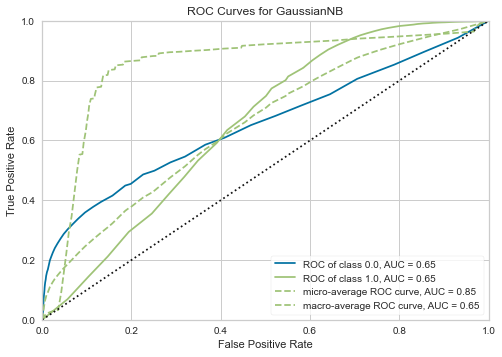

In [52]:
plot_model(best_model, plot = 'auc')

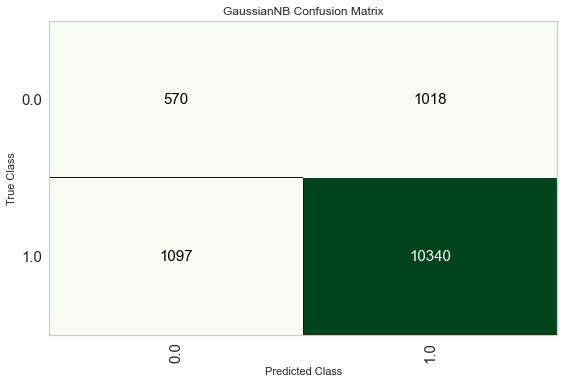

In [54]:
plot_model(best_model, plot = 'confusion_matrix')

In [55]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

The model did a great job in predicting satisfied customers, but it is not quite good at predicting unsatisfied customers, which may imply that there are some other factors besides delivery time like product quality made customers unsatisfied, but we do not have sufficient data to improve the model with more features.

# Conclusion

By studying the Olist data, we have the following findings.
The Olist platform is established in 2015, transaction is still not active in 2017, most customers only make one order in the whole year, and most transaction values are quite low. Thus, it is necessary to boost transaction volume.
In order to increase sales, we should figure out how to improve customer satisfaction. From the model, we can be sure that delivery time must be crucial to customer satisfaction, and this also affects customer retention.
By studying the Olist data, we have an example of customer behavior in E-Commerce field. Hopefully, we can use the findings above to apply in other companies E-Commerce field.